In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import csv
from collections import defaultdict
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [52]:
df = pd.read_csv('weatherAUS.csv', delimiter=',')
#df.info()

In [53]:
df.drop(['Date', 'Location'], axis=1, inplace=True)

In [54]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df = obj_df.fillna({"WindGustDir": "NAN"})

#print(obj_df["WindDir9am"].value_counts())
obj_df = obj_df.fillna({"WindDir9am": "NAN"})

#print(obj_df["WindDir3pm"].value_counts())
obj_df = obj_df.fillna({"WindDir3pm": "NAN"})

#print(obj_df["RainToday"].value_counts())
obj_df = obj_df.fillna({"RainToday": "NAN"})


In [55]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
wind_f = enc.fit_transform(obj_df['WindGustDir'].values.reshape(-1, 1))

WindGustDir = pd.DataFrame(wind_f, columns=['windgustdir' + str(i) for i in range(wind_f.shape[1])])
df.drop(['WindGustDir'], axis=1, inplace=True)
df = pd.concat([df, WindGustDir],axis = 1)

In [56]:
wind_f = enc.fit_transform(obj_df['WindDir9am'].values.reshape(-1, 1))

WindDir9am = pd.DataFrame(wind_f, columns=['WindDir9am' + str(i) for i in range(wind_f.shape[1])])
df.drop(['WindDir9am'], axis=1, inplace=True)
df = pd.concat([df, WindDir9am],axis = 1)

In [57]:
wind_f = enc.fit_transform(obj_df['WindDir3pm'].values.reshape(-1, 1))

WindDir3pm = pd.DataFrame(wind_f, columns=['WindDir3pm' + str(i) for i in range(wind_f.shape[1])])
df.drop(['WindDir3pm'], axis=1, inplace=True)
df = pd.concat([df, WindDir3pm],axis = 1)

In [58]:
rain_f = enc.fit_transform(obj_df['RainToday'].values.reshape(-1, 1))

RainToday = pd.DataFrame(rain_f, columns=['RainToday' + str(i) for i in range(rain_f.shape[1])])
df.drop(['RainToday'], axis=1, inplace=True)
df = pd.concat([df, RainToday],axis = 1)

In [59]:
#df.info()

In [60]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [61]:
#df.info()

In [62]:
from sklearn import preprocessing

df = df.replace({'Yes': 1}, regex=True)
df = df.replace({'No': 0}, regex=True)

# x = data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# data = pd.DataFrame(x_scaled)

In [63]:
y = df['RainTomorrow']
df.drop(['RainTomorrow'], axis=1, inplace=True)
X = df

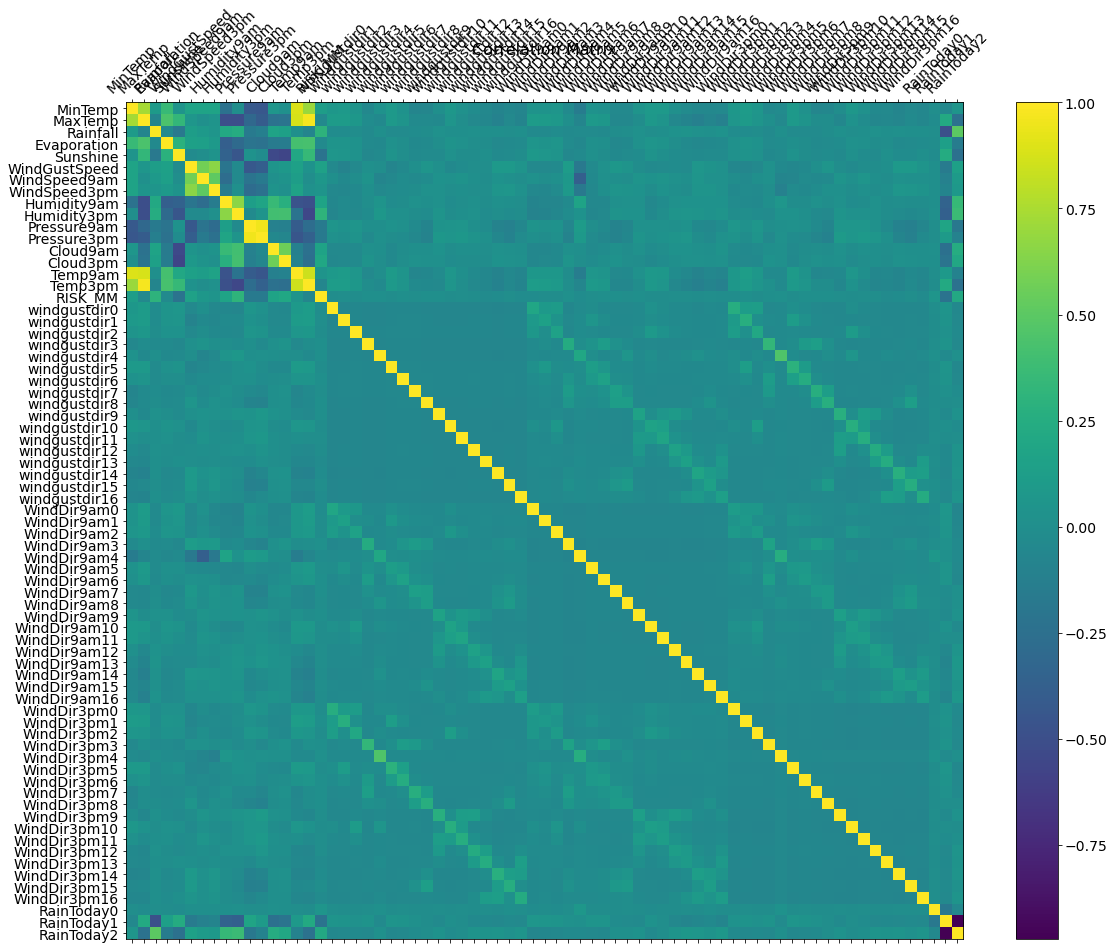

In [64]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# corr = data.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [65]:
df.drop(['Temp9am', 'Temp3pm', 'RainToday2'], axis=1, inplace=True)

In [66]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.75, shuffle=False)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [77]:
%%time
from sklearn.naive_bayes import  *

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print (np.mean(prediction == y_test))

0.9386199330501561
Wall time: 275 ms


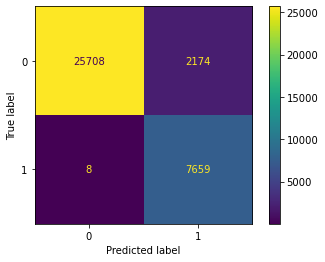

In [68]:
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [78]:
%%time
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print (np.mean(prediction == y_test))

0.9999437396269937
Wall time: 17.2 s


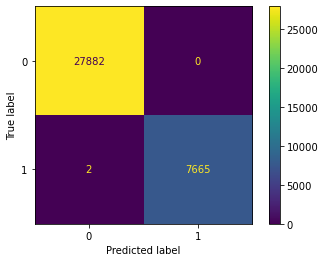

In [70]:
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [80]:
%%time
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

(np.mean(prediction == y_test))

Wall time: 2min 1s


0.8982812456046584

In [71]:
n_nb = range(1, 10)
res = []

for i in n_nb: 
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)

  prediction = neigh.predict(X_test)

  res.append((np.mean(prediction == y_test)))

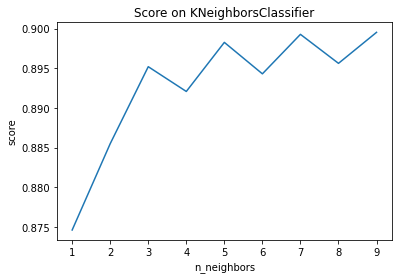

In [72]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

Среди всех моделей, логистическая регрессия показала наилучший результат, близкий к идеальному (RISK_MM является тому причиной). Удалив RISK_MM мы получаем правильность предсказаний около 85%. Более того, логистическая регрессия является достаточно быстрой, и как итог она является наилучшим выбором из указанных 3 для данного датасета.

Самой быстрой моделью является Байесовский классификатор, в то же время он демонстрирует весьма неплохой результат предсказания целевой переменной. Метод ближайших соседей работает дольше всего и с увеличением кол-ва соседей результат приближается к 90% совпадению

Ниже приведены оценки качества, при удаленной фиче RISK_MM.

In [81]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [82]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.75, shuffle=False)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [83]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print (np.mean(prediction == y_test))

0.8503755379898169


In [84]:
from sklearn.naive_bayes import  *

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print (np.mean(prediction == y_test))

0.7997412022841711


In [85]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

(np.mean(prediction == y_test))

0.8321190469492813